

Please fill out:
* Student name: 
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


![realestate](https://th.bing.com/th/id/OIP.UQb_wxOLWE02TQCZBi40EwHaE8?rs=1&pid=ImgDetMain)

# BUSINESS UNDERSTANDING.
The real estate agency aims to provide valuable advice to homeowners on how specific home renovations  will impact the estimated value of their homes. The primary objective is to help homeowners make informed decisions about which renovations could potentially yield the highest return on investment in terms of increased property value.

In [17]:
#Loading data
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
#checking on the null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
#checking  the data types for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [21]:
df['waterfront'].value_counts()


NO     19075
YES      146
Name: waterfront, dtype: int64

# Data preparation


In [22]:
#checking for duplicates
df.duplicated().any()


False

In [23]:
#filling the missing values using the mode method
mode_value = df['waterfront'].mode().iloc[0]
df['waterfront'].fillna(mode_value, inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
#checking for the unique values in view
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [26]:
#dropping the values in 'view'columns
df.dropna(subset=['view'],inplace=True)


In [27]:
#checking if the nullvalues has been dropped
df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [28]:
#dropping the 'year renovated'
df.dropna(subset=['yr_renovated'],inplace=True)


In [29]:
#checking if the nullvalues has been dropped
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
#dropping the columns
columns=['lat','long','sqft_basement','sqft_living15','sqft_lot15','sqft_above','view']
df.drop(columns=columns, inplace=True)


In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [41]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955,0.0,98178
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,1991.0,98125
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,0.0,98136
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,0.0,98074
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,0.0,98053


In [37]:
#changing the data type of the date 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#changing the data type for the zipcode
df['zipcode'] = df['zipcode'].astype('string')

In [42]:
#checking  the data types for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            17704 non-null  int64         
 1   date          17704 non-null  datetime64[ns]
 2   price         17704 non-null  float64       
 3   bedrooms      17704 non-null  int64         
 4   bathrooms     17704 non-null  float64       
 5   sqft_living   17704 non-null  int64         
 6   sqft_lot      17704 non-null  int64         
 7   floors        17704 non-null  float64       
 8   waterfront    17704 non-null  object        
 9   condition     17704 non-null  object        
 10  grade         17704 non-null  object        
 11  yr_built      17704 non-null  int64         
 12  yr_renovated  17704 non-null  float64       
 13  zipcode       17704 non-null  string        
dtypes: datetime64[ns](1), float64(4), int64(5), object(3), string(1)
memory usage: 2.0+ MB

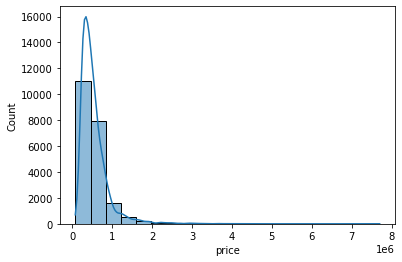

In [46]:
#checking outliers
# Assuming 'df' is your DataFrame
sns.histplot(df['price'],bins=20, kde=True)
plt.show()